1,

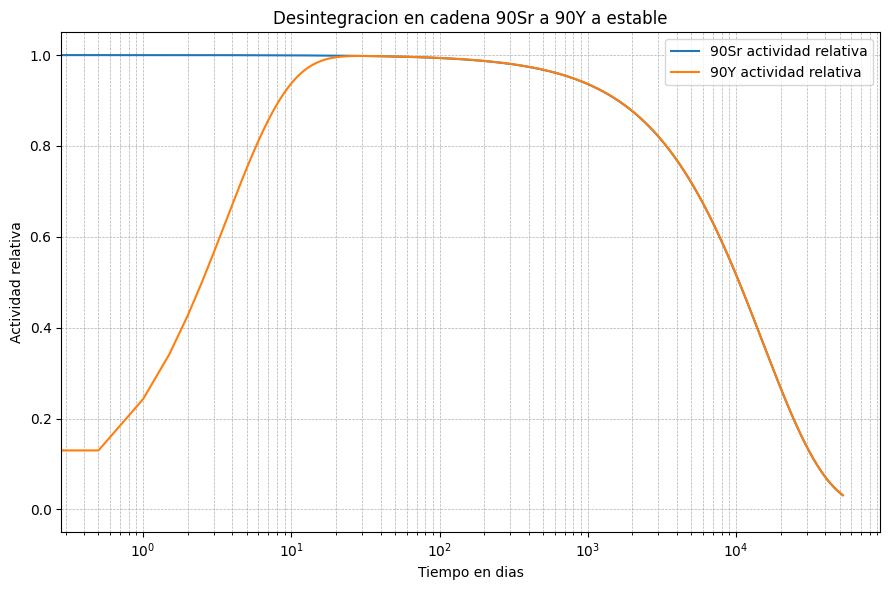

Constante lambda del Sr: 6.59393173695081e-05 por dia
Constante lambda del Y: 0.25960568560297576 por dia
Tiempo en que la actividad del 90Y es maxima: 30.0 dias
Actividad relativa maxima del 90Y: 0.9980389784668386


In [4]:
# Simulacion de la desintegracion en cadena del 90Sr que pasa a 90Y y luego a un elemento estable
# Metodo numerico: Euler explicito

import numpy as np
import matplotlib.pyplot as plt

# Datos del problema
vida_media_sr_anios = 28.78
vida_media_y_dias = 2.67
dias_por_anio = 365.25
vida_media_sr_dias = vida_media_sr_anios * dias_por_anio

# Calculo de las constantes de desintegracion
lambda_sr = np.log(2) / vida_media_sr_dias
lambda_y = np.log(2) / vida_media_y_dias

# Condiciones iniciales
cantidad_inicial_sr = 1.0
cantidad_inicial_y = 0.0
actividad_inicial_sr = lambda_sr * cantidad_inicial_sr

# Parametros numericos
tiempo_total = 5 * vida_media_sr_dias
paso_tiempo = 0.5
numero_pasos = int(np.ceil(tiempo_total / paso_tiempo)) + 1
tiempo = np.linspace(0, paso_tiempo * (numero_pasos - 1), numero_pasos)

# Arreglos para guardar resultados
cantidad_sr = np.zeros(numero_pasos)
cantidad_y = np.zeros(numero_pasos)
actividad_sr = np.zeros(numero_pasos)
actividad_y = np.zeros(numero_pasos)

# Valores iniciales
cantidad_sr[0] = cantidad_inicial_sr
cantidad_y[0] = cantidad_inicial_y
actividad_sr[0] = lambda_sr * cantidad_sr[0]
actividad_y[0] = lambda_y * cantidad_y[0]

# Metodo de Euler
for i in range(1, numero_pasos):
    cambio_sr = -lambda_sr * cantidad_sr[i-1]
    cambio_y = lambda_sr * cantidad_sr[i-1] - lambda_y * cantidad_y[i-1]

    cantidad_sr[i] = cantidad_sr[i-1] + paso_tiempo * cambio_sr
    cantidad_y[i] = cantidad_y[i-1] + paso_tiempo * cambio_y

    actividad_sr[i] = lambda_sr * cantidad_sr[i]
    actividad_y[i] = lambda_y * cantidad_y[i]

# Actividades relativas
actividad_sr_relativa = actividad_sr / actividad_inicial_sr
actividad_y_relativa = actividad_y / actividad_inicial_sr

# Graficar
plt.figure(figsize=(9,6))
plt.plot(tiempo, actividad_sr_relativa, label="90Sr actividad relativa")
plt.plot(tiempo, actividad_y_relativa, label="90Y actividad relativa")
plt.xscale("log")
plt.xlabel("Tiempo en dias")
plt.ylabel("Actividad relativa")
plt.title("Desintegracion en cadena 90Sr a 90Y a estable")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

# Resultados adicionales
indice_maximo_y = np.argmax(actividad_y_relativa)
tiempo_maximo_y = tiempo[indice_maximo_y]
valor_maximo_y = actividad_y_relativa[indice_maximo_y]

print("Constante lambda del Sr:", lambda_sr, "por dia")
print("Constante lambda del Y:", lambda_y, "por dia")
print("Tiempo en que la actividad del 90Y es maxima:", tiempo_maximo_y, "dias")
print("Actividad relativa maxima del 90Y:", valor_maximo_y)

2.

RC=0.01 -> Vout final = -0.96667, Vout max = 1.00000, Vout min = -1.00000
RC=0.1 -> Vout final = -0.98330, Vout max = 0.99319, Vout min = -0.98650
RC=1 -> Vout final = -0.24470, Vout max = 0.39314, Vout min = -0.24470


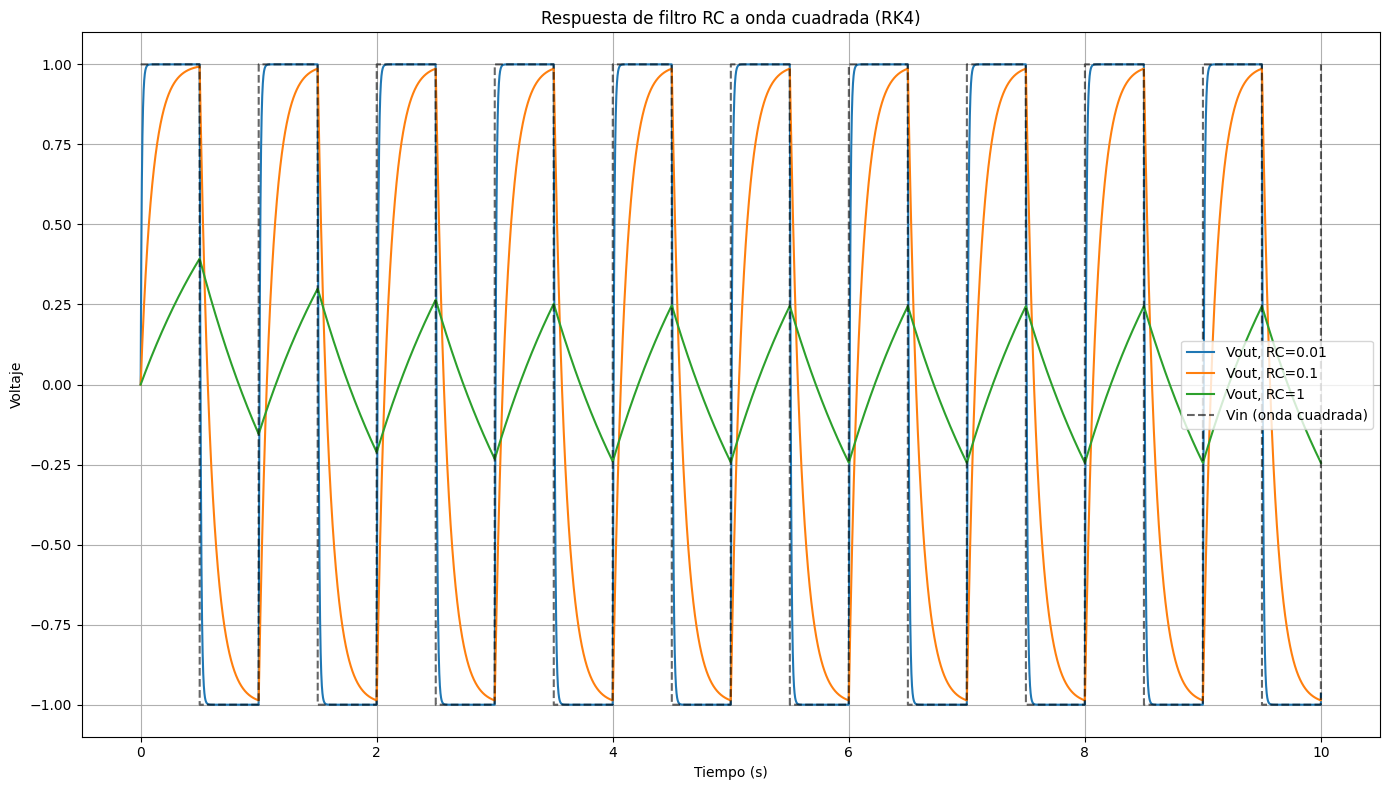

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
t_max = 10
dt = 0.001
t = np.arange(0, t_max + dt, dt)
y0 = 0

# Onda cuadrada
def Vin(ti):
    return 1 if int(2 * ti) % 2 == 0 else -1

# Ecuacion diferencial
def dVout_dt(ti, vo, RC):
    return (1 / RC) * (Vin(ti) - vo)

# RK4
def rk4(f, y0, t, RC):
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(1, len(t)):
        h = t[i] - t[i-1]
        k1 = f(t[i-1], y[i-1], RC)
        k2 = f(t[i-1] + h/2, y[i-1] + h*k1/2, RC)
        k3 = f(t[i-1] + h/2, y[i-1] + h*k2/2, RC)
        k4 = f(t[i-1] + h, y[i-1] + h*k3, RC)
        y[i] = y[i-1] + h * (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

# Simulación
RC_vals = [0.01, 0.1, 1]
res = []

for RC in RC_vals:
    vo = rk4(dVout_dt, y0, t, RC)
    res.append((RC, vo))
    print(f"RC={RC} -> Vout final = {vo[-1]:.5f}, Vout max = {np.max(vo):.5f}, Vout min = {np.min(vo):.5f}")

# Grafica
plt.figure(figsize=(14, 8))
for RC, vo in res:
    plt.plot(t, vo, label=f'Vout, RC={RC}')

Vin_vals = [Vin(tt) for tt in t]
plt.plot(t, Vin_vals, 'k--', label='Vin (onda cuadrada)', alpha=0.6)

plt.title('Respuesta de filtro RC a onda cuadrada (RK4)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


3.

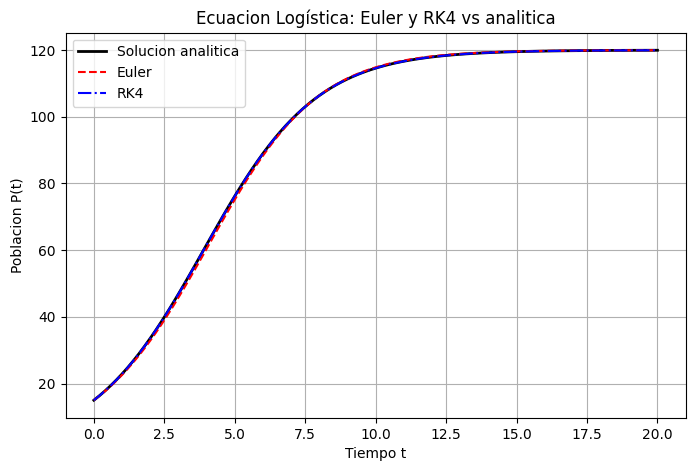

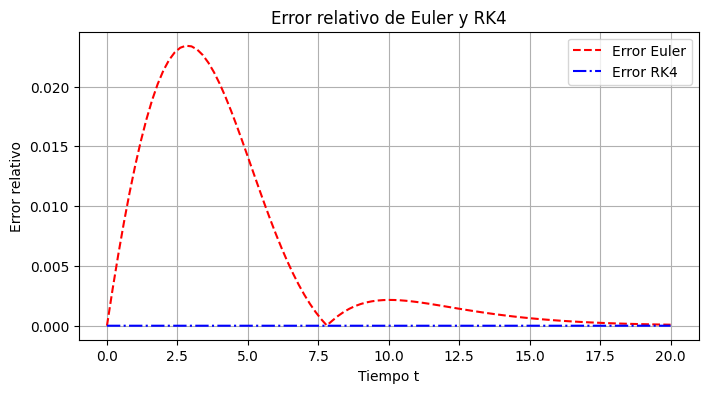

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#1. Ecuacion logistica
def my_logistic_eq(t, P, r, K):
    return r * P * (1 - P / K)

#2. Metodo de Euler
def euler_method(f, t0, P0, h, tf, r, K):
    n_steps = int((tf - t0) / h) + 1
    t_values = np.linspace(t0, tf, n_steps)
    P_values = np.zeros(n_steps)
    P_values[0] = P0
    for i in range(n_steps - 1):
        P_values[i+1] = P_values[i] + h * f(t_values[i], P_values[i], r, K)
    return t_values, P_values

#3. Metodo de RK4
def rk4_method(f, t0, P0, h, tf, r, K):
    n_steps = int((tf - t0) / h) + 1
    t_values = np.linspace(t0, tf, n_steps)
    P_values = np.zeros(n_steps)
    P_values[0] = P0
    for i in range(n_steps - 1):
        k1 = f(t_values[i], P_values[i], r, K)
        k2 = f(t_values[i] + h/2, P_values[i] + h*k1/2, r, K)
        k3 = f(t_values[i] + h/2, P_values[i] + h*k2/2, r, K)
        k4 = f(t_values[i] + h, P_values[i] + h*k3, r, K)
        P_values[i+1] = P_values[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return t_values, P_values

# 4. Solucion analítica
def logistic_analytic(t, P0, r, K):
    return (K * P0 * np.exp(r * t)) / (K + P0 * (np.exp(r * t) - 1))

# Parametros del problema (poner los que da el enunciado)
P0 = 15   # población inicial
r = 0.5   # tasa de crecimiento
K = 120   # capacidad de carga
t0 = 0
tf = 20
h = 0.2   # paso de integración

# Calcular soluciones
t_euler, P_euler = euler_method(my_logistic_eq, t0, P0, h, tf, r, K)
t_rk4, P_rk4 = rk4_method(my_logistic_eq, t0, P0, h, tf, r, K)
P_exact = logistic_analytic(t_euler, P0, r, K)

# Calcular errores relativos
error_euler = np.abs((P_exact - P_euler) / P_exact)
error_rk4 = np.abs((P_exact - P_rk4) / P_exact)

# Graficar P(t)
plt.figure(figsize=(8, 5))
plt.plot(t_euler, P_exact, 'k', linewidth=2, label="Solucion analitica")
plt.plot(t_euler, P_euler, 'r--', label="Euler")
plt.plot(t_rk4, P_rk4, 'b-.', label="RK4")
plt.xlabel("Tiempo t")
plt.ylabel("Poblacion P(t)")
plt.title("Ecuacion Logística: Euler y RK4 vs analitica")
plt.legend()
plt.grid(True)
plt.show()

# --- 9. Graficar errores relativos ---
plt.figure(figsize=(8, 4))
plt.plot(t_euler, error_euler, 'r--', label="Error Euler")
plt.plot(t_rk4, error_rk4, 'b-.', label="Error RK4")
plt.xlabel("Tiempo t")
plt.ylabel("Error relativo")
plt.title("Error relativo de Euler y RK4")
plt.legend()
plt.grid(True)
plt.show()


4.

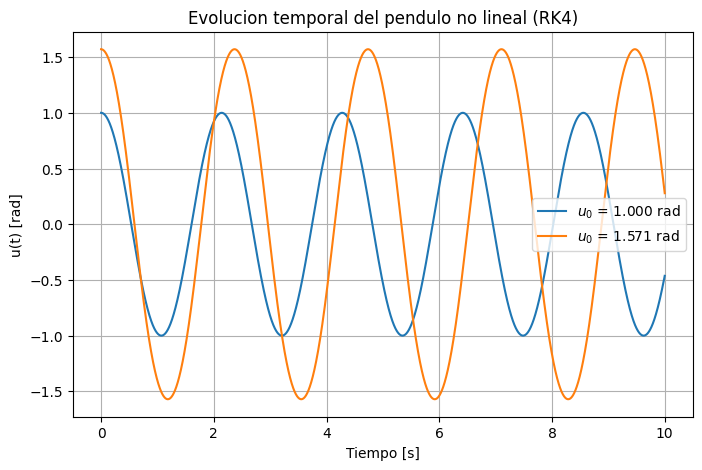

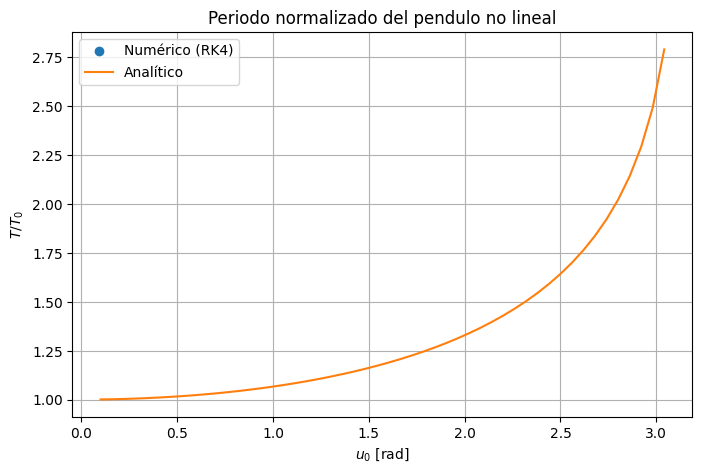

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk

# Parametros
g = 9.81
l = 1.0
T0 = 2 * np.pi * np.sqrt(l / g)  # periodo en el caso lineal

# Metodo RK4
def RK4(f, t0, tf, Y0, h):
    n = int((tf - t0) / h)
    tn = np.zeros(n + 1, dtype=float)
    m = len(Y0)
    Yn = np.zeros((m, n + 1), dtype=float)

    tn[0] = t0
    Yn[:, 0] = Y0

    for k in range(n):
        t_k = tn[k]
        y_k = Yn[:, k]

        k1 = h * f(t_k,           y_k)
        k2 = h * f(t_k + h/2,     y_k + k1/2)
        k3 = h * f(t_k + h/2,     y_k + k2/2)
        k4 = h * f(t_k + h,       y_k + k3)

        Yn[:, k + 1] = y_k + (k1 + 2*k2 + 2*k3 + k4) / 6
        tn[k + 1] = t_k + h

    return tn, Yn

# Sistema del pendulo
def pendulo(t, Y):
    u, v = Y
    return np.array([v, -(g / l) * np.sin(u)])

# Funcion para calcular el periodo numerico
def periodo_numerico(u0, h=0.001, max_time=20):
    t, Y = RK4(pendulo, 0, max_time, [u0, 0], h)
    u = Y[0, :]
    v = Y[1, :]

    for i in range(1, len(t)):
        if u[i-1] < u0 and u[i] >= u0 and v[i] > 0:
            return t[i]
    return np.nan

# 1) Solución u(t) para u0 = 1 y u0 = π/2
h = 0.001
tf = 10  # segundos para graficar

u0_cases = [1.0, np.pi/2]
plt.figure(figsize=(8, 5))
for u0 in u0_cases:
    t, Y = RK4(pendulo, 0, tf, [u0, 0], h)
    plt.plot(t, Y[0], label=f"$u_0$ = {u0:.3f} rad")
plt.xlabel("Tiempo [s]")
plt.ylabel("u(t) [rad]")
plt.title("Evolucion temporal del pendulo no lineal (RK4)")
plt.grid(True)
plt.legend()
plt.show()

# 2) Barrido de amplitudes para T/T0
u0_vals = np.linspace(0.1, np.pi - 0.1, 50)
T_num = []
T_an = []

for u0 in u0_vals:
    # Periodo numerico
    Tn = periodo_numerico(u0, h=h)
    T_num.append(Tn / T0)

    # Periodo analitico
    alpha = np.sin(u0 / 2)**2
    Ta = (2 / np.pi) * ellipk(alpha)  # ya está normalizado
    T_an.append(Ta)

# Gráfica comparativa
plt.figure(figsize=(8, 5))
plt.plot(u0_vals, T_num, 'o', label="Numérico (RK4)")
plt.plot(u0_vals, T_an, '-', label="Analítico")
plt.xlabel(r"$u_0$ [rad]")
plt.ylabel(r"$T/T_0$")
plt.title("Periodo normalizado del pendulo no lineal")
plt.grid(True)
plt.legend()
plt.show()

5.

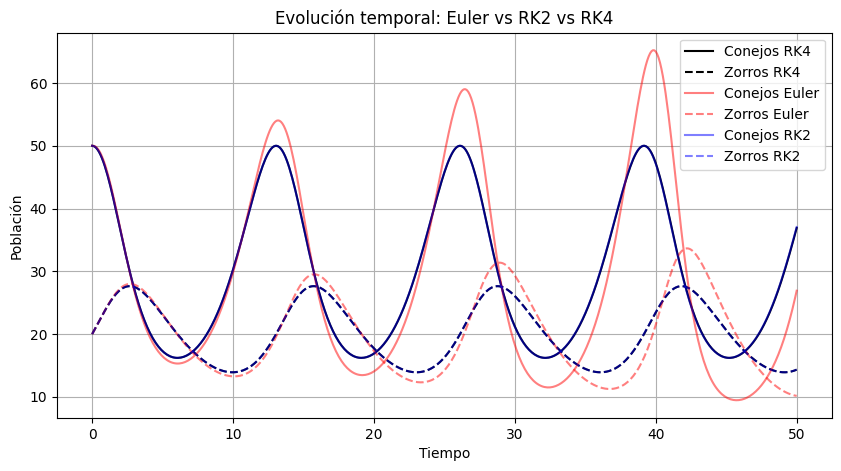

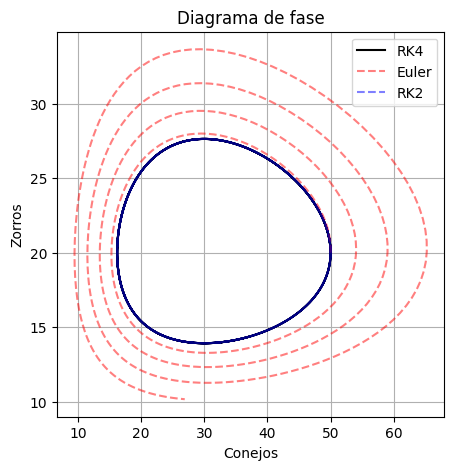

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Metodos de integracion
def Euler_OrdenSuperior(f, t0, tf, Y0, h):
    nodos = int((tf - t0) / h)
    m = len(Y0)
    t = np.zeros(nodos + 1)
    Yn = np.zeros((m, nodos + 1))
    t[0] = t0
    Yn[:, 0] = Y0
    for k in range(nodos):
        t[k + 1] = t[k] + h
        Yn[:, k + 1] = Yn[:, k] + h * f(t[k], Yn[:, k])
    return t, Yn

def RK2_PuntoMedio(f, t0, tf, Y0, h):
    nodos = int((tf - t0) / h)
    m = len(Y0)
    t = np.zeros(nodos + 1)
    Y = np.zeros((m, nodos + 1))
    t[0] = t0
    Y[:, 0] = Y0
    for k in range(nodos):
        t[k + 1] = t[k] + h
        k1 = f(t[k], Y[:, k])
        k2 = f(t[k] + h/2, Y[:, k] + h/2 * k1)
        Y[:, k + 1] = Y[:, k] + h * k2
    return t, Y

def RK4(f, t0, tf, Y0, h):
    n = int((tf - t0) / h)
    tn = np.zeros(n + 1)
    m = len(Y0)
    Yn = np.zeros((m, n + 1))
    tn[0] = t0
    Yn[:, 0] = Y0
    for k in range(n):
        t_k = tn[k]
        y_k = Yn[:, k]
        k1 = h * f(t_k,           y_k)
        k2 = h * f(t_k + h/2,     y_k + k1/2)
        k3 = h * f(t_k + h/2,     y_k + k2/2)
        k4 = h * f(t_k + h,       y_k + k3)
        Yn[:, k + 1] = y_k + (k1 + 2*k2 + 2*k3 + k4) / 6
        tn[k + 1]   = t_k + h
    return tn, Yn

# Sistema Lotka–Volterra
alpha, beta, gamma, delta = 0.8, 0.04, 0.3, 0.01

def lotka_volterra(t, Y):
    x, y = Y
    dxdt = alpha * x - beta * x * y
    dydt = -gamma * y + delta * x * y
    return np.array([dxdt, dydt])

# Parametros de simulacion
Y0 = np.array([50.0, 20.0])
t0, tf, h = 0, 50, 0.1

#Integracion
t_eu, Y_eu = Euler_OrdenSuperior(lotka_volterra, t0, tf, Y0, h)
t_rk2, Y_rk2 = RK2_PuntoMedio(lotka_volterra, t0, tf, Y0, h)
t_rk4, Y_rk4 = RK4(lotka_volterra, t0, tf, Y0, h)


# Graficas

plt.figure(figsize=(10,5))
plt.plot(t_rk4, Y_rk4[0], 'k-', label='Conejos RK4')
plt.plot(t_rk4, Y_rk4[1], 'k--', label='Zorros RK4')
plt.plot(t_eu,  Y_eu[0],  'r-', alpha=0.5, label='Conejos Euler')
plt.plot(t_eu,  Y_eu[1],  'r--', alpha=0.5, label='Zorros Euler')
plt.plot(t_rk2, Y_rk2[0], 'b-', alpha=0.5, label='Conejos RK2')
plt.plot(t_rk2, Y_rk2[1], 'b--', alpha=0.5, label='Zorros RK2')
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend()
plt.title("Evolución temporal: Euler vs RK2 vs RK4")
plt.grid()
plt.show()

# Diagrama de fase
plt.figure(figsize=(5,5))
plt.plot(Y_rk4[0], Y_rk4[1], 'k-', label="RK4")
plt.plot(Y_eu[0],  Y_eu[1],  'r--', alpha=0.5, label="Euler")
plt.plot(Y_rk2[0], Y_rk2[1], 'b--', alpha=0.5, label="RK2")
plt.xlabel("Conejos")
plt.ylabel("Zorros")
plt.title("Diagrama de fase")
plt.legend()
plt.grid()
plt.show()

6.

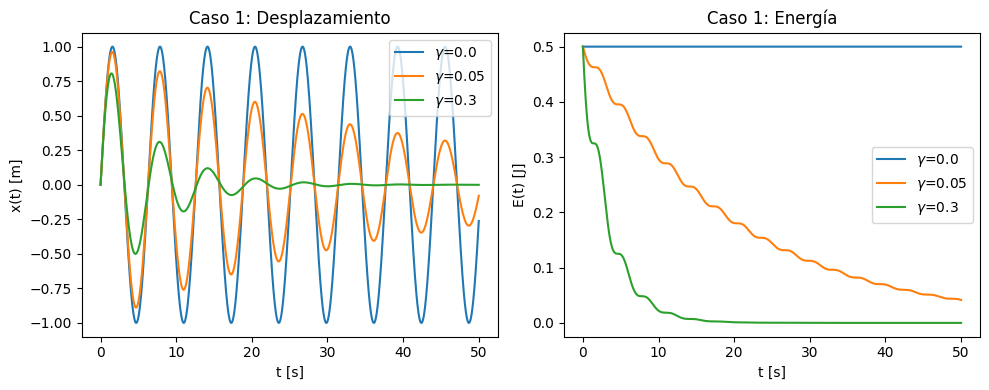

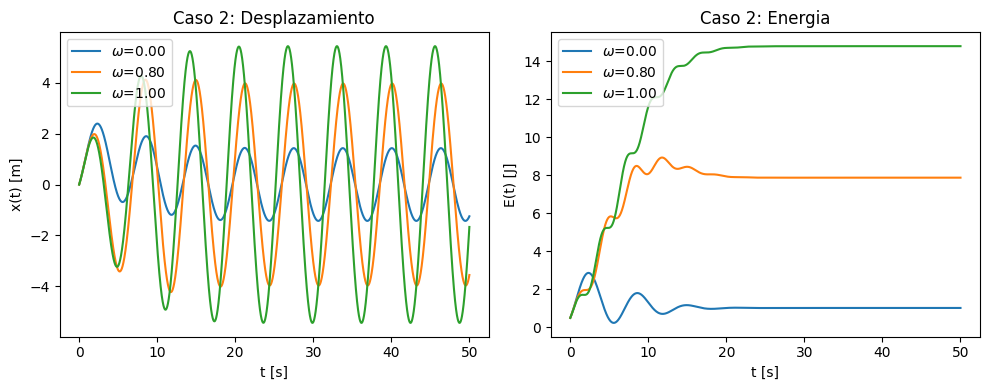

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Metodo Rk4
def RK4(f, t0, tf, Y0, h):
    """
    Realiza la integración de un sistema de EDO en el intervalo [t0, tf]
    usando el mEtodo de Runge–Kutta de orden 4.
    """
    n = int((tf - t0) / h)                     # numero de pasos
    tn = np.zeros(n + 1, dtype=float)          # vector de tiempos
    m = len(Y0)                                # dimension del sistema
    Yn = np.zeros((m, n + 1), dtype=float)     # matriz

    tn[0]    = t0                              # tiempo inicial
    Yn[:, 0] = Y0                              # condición inicial

    for k in range(n):
        t_k = tn[k]                            # extraigo tk
        y_k = Yn[:, k]                         # extraigo yk

        # calculo de los cuatro estimadores
        k1 = h * f(t_k,           y_k)         # pendiente en el inicio
        k2 = h * f(t_k + h/2,     y_k + k1/2)  # pendiente a mitad con k1
        k3 = h * f(t_k + h/2,     y_k + k2/2)  # pendiente a mitad con k2
        k4 = h * f(t_k + h,       y_k + k3)    # pendiente al final

        # combinación de estimadores para yk+1
        Yn[:, k + 1] = y_k + (k1 + 2*k2 + 2*k3 + k4) / 6
        tn[k + 1]   = t_k + h                  # actualizar tiempo

    return tn, Yn                              # devolver tiempos y soluciones


# Funcion del oscilador forzado amortiguado

def f_osc(t, Y, m, gamma, omega0, F_func):
    x, v = Y
    dxdt = v
    dvdt = F_func(t)/m - gamma*v - omega0**2 * x
    return np.array([dxdt, dvdt])


# Parametros

m = 1.0          # kg
omega0 = 1.0     # rad/s
x0 = 0.0
v0 = 1.0
t0 = 0.0
tf = 50.0
h = 0.01

# Caso 1: F = 0, gamma en [0, 0.05, 0.3]

gammas = [0.0, 0.05, 0.3]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
for gamma in gammas:
    F_func = lambda t: 0.0
    t, Y = RK4(lambda t, Y: f_osc(t, Y, m, gamma, omega0, F_func),
               t0, tf, [x0, v0], h)
    x, v = Y
    E = 0.5*m*v**2 + 0.5*m*omega0**2*x**2
    plt.plot(t, x, label=f"$\\gamma$={gamma}")
plt.xlabel("t [s]")
plt.ylabel("x(t) [m]")
plt.title("Caso 1: Desplazamiento")
plt.legend()

plt.subplot(1,2,2)
for gamma in gammas:
    F_func = lambda t: 0.0
    t, Y = RK4(lambda t, Y: f_osc(t, Y, m, gamma, omega0, F_func),
               t0, tf, [x0, v0], h)
    x, v = Y
    E = 0.5*m*v**2 + 0.5*m*omega0**2*x**2
    plt.plot(t, E, label=f"$\\gamma$={gamma}")
plt.xlabel("t [s]")
plt.ylabel("E(t) [J]")
plt.title("Caso 1: Energía")
plt.legend()
plt.tight_layout()
plt.show()

# Caso 2: gamma = 0, pulso gaussiano

gamma = 0.0
F0 = 1.0
T = 10.0
omegas = [0.0, 0.8*omega0, omega0]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
for omega in omegas:
    F_func = lambda t: F0*np.cos(omega*t)*np.exp(-t**2/T**2)
    t, Y = RK4(lambda t, Y: f_osc(t, Y, m, gamma, omega0, F_func),
               t0, tf, [x0, v0], h)
    x, v = Y
    E = 0.5*m*v**2 + 0.5*m*omega0**2*x**2
    plt.plot(t, x, label=f"$\\omega$={omega:.2f}")
plt.xlabel("t [s]")
plt.ylabel("x(t) [m]")
plt.title("Caso 2: Desplazamiento")
plt.legend()

plt.subplot(1,2,2)
for omega in omegas:
    F_func = lambda t: F0*np.cos(omega*t)*np.exp(-t**2/T**2)
    t, Y = RK4(lambda t, Y: f_osc(t, Y, m, gamma, omega0, F_func),
               t0, tf, [x0, v0], h)
    x, v = Y
    E = 0.5*m*v**2 + 0.5*m*omega0**2*x**2
    plt.plot(t, E, label=f"$\\omega$={omega:.2f}")
plt.xlabel("t [s]")
plt.ylabel("E(t) [J]")
plt.title("Caso 2: Energia")
plt.legend()
plt.tight_layout()
plt.show()

7.

Autovalores en L4 (representativos):
  mu=0.000001 -> max Re(λ)= 3.376e-16, eigs=[-7.77156117e-16-0.99999662j -7.77156117e-16+0.99999662j
  3.37585524e-16-0.00259808j  3.37585524e-16+0.00259808j]
  mu=0.001000 -> max Re(λ)= 2.776e-16, eigs=[-5.23717083e-16-0.08239748j -5.23717083e-16+0.08239748j
  2.77555756e-16-0.99659955j  2.77555756e-16+0.99659955j]
  mu=0.010000 -> max Re(λ)= 1.501e-16, eigs=[-1.73472348e-17-0.96332211j -1.73472348e-17+0.96332211j
  1.50053581e-16-0.26834775j  1.50053581e-16+0.26834775j]
  mu=0.020000 -> max Re(λ)= 9.992e-16, eigs=[-9.03790931e-16-0.39613844j -9.03790931e-16+0.39613844j
  9.99200722e-16-0.91819079j  9.99200722e-16+0.91819079j]
  mu=0.030000 -> max Re(λ)= 2.158e-15, eigs=[-1.83186799e-15-0.85525595j -1.83186799e-15+0.85525595j
  2.15799600e-15-0.51820581j  2.15799600e-15+0.51820581j]
  mu=0.038000 -> max Re(λ)= 4.427e-15, eigs=[-4.19803081e-15-0.74631257j -4.19803081e-15+0.74631257j
  4.42701431e-15-0.66559563j  4.42701431e-15+0.66559563j]
  mu=0.04

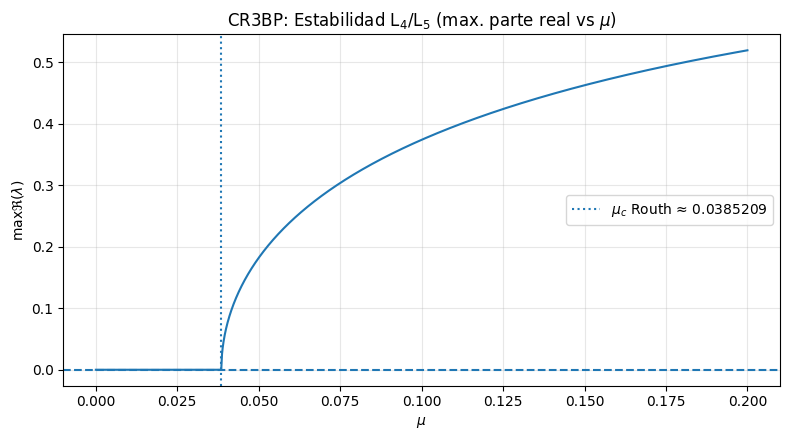

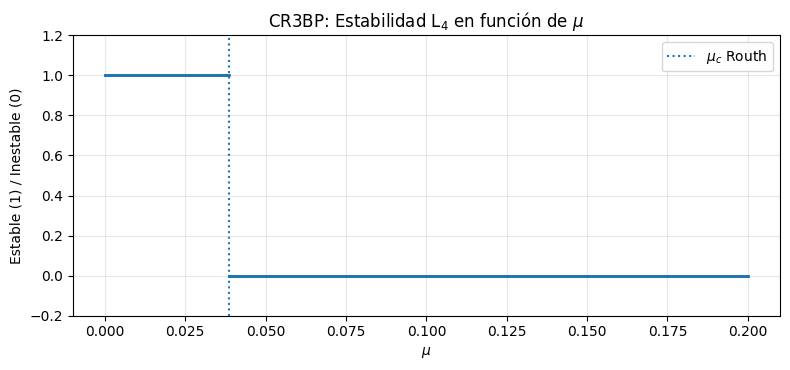

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvals

# 1) Geometria y puntos de Lagrange
def L4(mu):
    return 0.5 - mu, np.sqrt(3)/2

def L5(mu):
    return 0.5 - mu, -np.sqrt(3)/2

# 2) Hessiano de Omega necesarios
def hessian_Omega_L4(mu):
    Oxx = 3.0/4.0
    Oyy = 9.0/4.0
    Oxy = (3.0*np.sqrt(3)/4.0) * (1.0 - 2.0*mu)
    return Oxx, Oxy, Oyy

def hessian_Omega_L5(mu):
    Oxx = 3.0/4.0
    Oyy = 9.0/4.0
    Oxy = - (3.0*np.sqrt(3)/4.0) * (1.0 - 2.0*mu)
    return Oxx, Oxy, Oyy

# 3) Matriz linealizada A
def A_matrix_from_hessian(Oxx, Oxy, Oyy):
    return np.array([[0.,     1.,    0.,    0.],
                     [Oxx,   0.,    Oxy,   2.],
                     [0.,     0.,    0.,    1.],
                     [Oxy,  -2.,   Oyy,   0.]], dtype=float)

def A_at_L4(mu):
    Oxx, Oxy, Oyy = hessian_Omega_L4(mu)
    return A_matrix_from_hessian(Oxx, Oxy, Oyy)

def A_at_L5(mu):
    Oxx, Oxy, Oyy = hessian_Omega_L5(mu)
    return A_matrix_from_hessian(Oxx, Oxy, Oyy)

# 4) Estabilidad (partes reales de autovalores)
def eigenvalues_L4(mu):
    return eigvals(A_at_L4(mu))

def eigenvalues_L5(mu):
    return eigvals(A_at_L5(mu))

def max_real_part(vals):
    return np.max(np.real(vals))

def is_stable(vals, tol=1e-10):
    return np.max(np.real(vals)) < tol

#Mu critico
def f_mu(mu, which='L4'):
    vals = eigenvalues_L4(mu) if which=='L4' else eigenvalues_L5(mu)
    return max_real_part(vals)

def bracket_mu(mu_min=1e-6, mu_max=0.2, N=4000, which='L4', thr=1e-12):
    mus = np.linspace(mu_min, mu_max, N)
    vals = np.array([f_mu(mu, which) for mu in mus])
    idx = np.where(vals > thr)[0]
    if len(idx) == 0:
        return None, None, mus, vals
    k = idx[0]
    a = mus[max(k-1,0)]
    b = mus[k]
    return a, b, mus, vals

def bisect_mu(a, b, which='L4', iters=80, thr=0.0):
    fa = f_mu(a, which)
    fb = f_mu(b, which)
    if not (fa <= thr and fb >= thr):
        # intentar invertir bracket si vino al reves
        fa, fb = f_mu(b, which), f_mu(a, which)
        if not (fa <= thr and fb >= thr):
            return None
        a, b = b, a
    for _ in range(iters):
        m = 0.5*(a+b)
        fm = f_mu(m, which)
        if fm <= thr:
            a = m
        else:
            b = m
    return 0.5*(a+b)

if __name__ == "__main__":
    # Comparacion con criterio de routh
    mu_Routh = 0.038520896504551

    # Ejemplos puntuales de autovalores
    examples = [1e-6, 1e-3, 0.01, 0.02, 0.03, 0.038, 0.04]
    print("Autovalores en L4 (representativos):")
    for mu in examples:
        lmb = np.sort_complex(eigenvalues_L4(mu))
        print(f"  mu={mu:.6f} -> max Re(λ)={max_real_part(lmb): .3e}, eigs={lmb}")

    # Barrido y mu critico numerico
    a, b, mus, maxRe = bracket_mu(mu_min=1e-6, mu_max=0.2, N=5000, which='L4', thr=1e-12)
    maxRe = np.array([f_mu(mu, 'L4') for mu in mus])

    if a is not None and b is not None:
        mu_crit = bisect_mu(a, b, which='L4', iters=80, thr=0.0)
    else:
        mu_crit = None

    print("\nmu crítico")
    print(f"  mu_c (num, L4)   = {mu_crit}" if mu_crit is not None else "  No se detecto cruce en el rango.")
    print(f"  mu_c (Routh)     = {mu_Routh}")

    # Casos reales
    mu_sun_earth   = 3.003489596e-6
    mu_sun_jupiter = 9.53874e-4

    for name, mu in [("Sol–Tierra", mu_sun_earth), ("Sol–Jupiter", mu_sun_jupiter)]:
        vals = eigenvalues_L4(mu)
        print(f"\n{name}: mu={mu:.9f}")
        print(f"  max Re(lambda) = {max_real_part(vals): .3e}")
        print(f"  Estable   = {is_stable(vals)}")
        print(f"  eigs      = {np.sort_complex(vals)}")

    # Graficas
    # (1) max Re(lambda) vs mu
    plt.figure(figsize=(8,4.5))
    plt.plot(mus, maxRe, lw=1.5)
    plt.axhline(0.0, ls='--')
    if mu_crit is not None:
        plt.axvline(mu_crit, ls='--', label=fr"$\mu_c$ num ≈ {mu_crit:.6f}")
    plt.axvline(mu_Routh, ls=':', label=r"$\mu_c$ Routh ≈ 0.0385209")
    plt.xlabel(r"$\mu$")
    plt.ylabel(r"$\max \Re(\lambda)$")
    plt.title(r"CR3BP: Estabilidad L$_4$/L$_5$ (max. parte real vs $\mu$)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # (2) Estabilidad booleana vs mu (opcional)
    stable_bool = np.array([is_stable(eigenvalues_L4(mu), tol=1e-12) for mu in mus], dtype=int)
    plt.figure(figsize=(8,3.8))
    plt.plot(mus, stable_bool, '.', ms=2)
    if mu_crit is not None:
        plt.axvline(mu_crit, ls='--', label=fr"$\mu_c$ num ≈ {mu_crit:.6f}")
    plt.axvline(mu_Routh, ls=':', label=r"$\mu_c$ Routh")
    plt.xlabel(r"$\mu$")
    plt.ylabel("Estable (1) / Inestable (0)")
    plt.title(r"CR3BP: Estabilidad L$_4$ en función de $\mu$")
    plt.ylim(-0.2, 1.2)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

8.


k 0.5
Valores propios: [0.+0.5j 0.-0.5j]
 Sistema estable (oscilaciones puras)


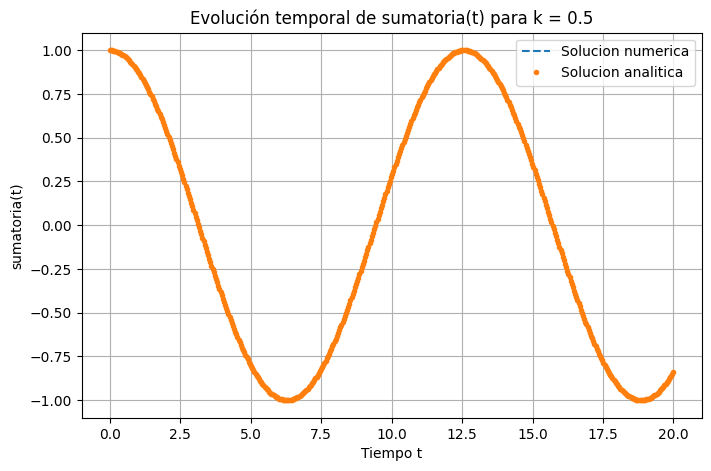


k 1.0
Valores propios: [0.+1.j 0.-1.j]
 Sistema estable (oscilaciones puras)


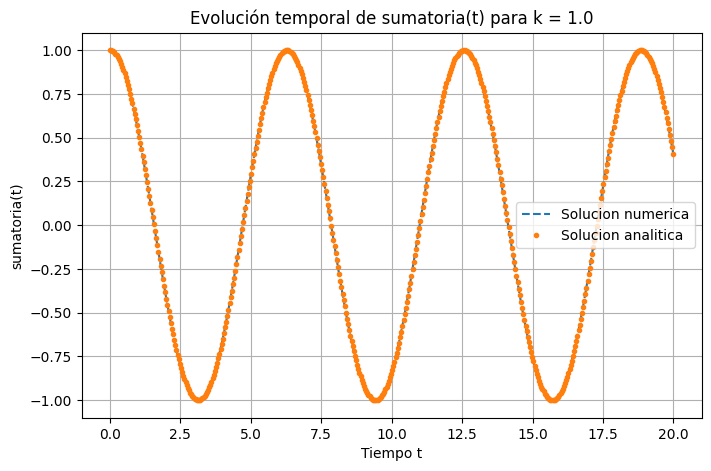


k 2.0
Valores propios: [0.+2.j 0.-2.j]
 Sistema estable (oscilaciones puras)


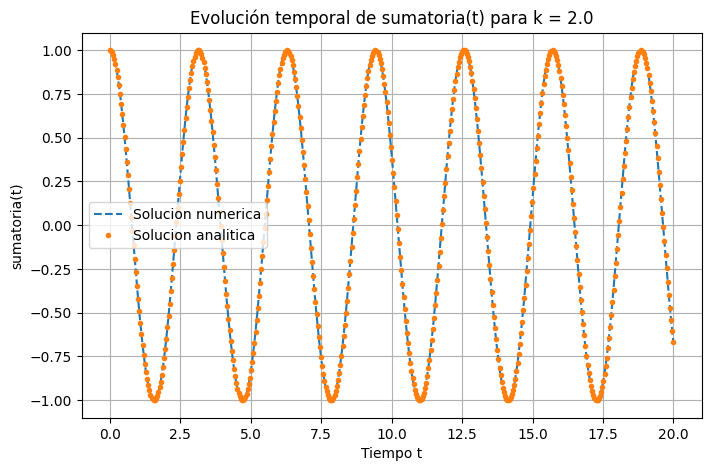

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Sigma0 = 1.0
Sigma_p0 = 0.0
t_max = 20
N_puntos = 500
kappa_valores = [0.5, 1.0, 2.0]

def matriz_A(kappa):
    return np.array([[0, 1],
                     [-kappa**2, 0]])

def solucion_analitica(t, kappa):
    return Sigma0 * np.cos(kappa * t) + (Sigma_p0 / kappa) * np.sin(kappa * t)

for kappa in kappa_valores:
    # 1) Valores propios
    A = matriz_A(kappa)
    valores_propios = np.linalg.eigvals(A)
    print(f"\nk {kappa}")
    print("Valores propios:", valores_propios)
    if np.all(np.real(valores_propios) == 0):
        print(" Sistema estable (oscilaciones puras)")
    elif np.any(np.real(valores_propios) > 0):
        print(" Sistema inestable (crecimiento exponencial)")
    else:
        print(" Sistema estable asintóticamente (decay exponencial)")

    # 2) Solucion numerica
    def sistema(t, Y):
        Sigma, Sigma_p = Y
        return [Sigma_p, -kappa**2 * Sigma]

    t_eval = np.linspace(0, t_max, N_puntos)
    sol_num = solve_ivp(sistema, [0, t_max], [Sigma0, Sigma_p0],
                        t_eval=t_eval, vectorized=True)

    # 3) Solucion analitica
    Sigma_ana = solucion_analitica(t_eval, kappa)

    # 4) Graficar comparacion
    plt.figure(figsize=(8, 5))
    plt.plot(t_eval, sol_num.y[0], '--', label="Solucion numerica")
    plt.plot(t_eval, Sigma_ana, '. ', label="Solucion analitica")
    plt.title(f"Evolución temporal de sumatoria(t) para k = {kappa}")
    plt.xlabel("Tiempo t")
    plt.ylabel("sumatoria(t)")
    plt.legend()
    plt.grid(True)
    plt.show()

9.

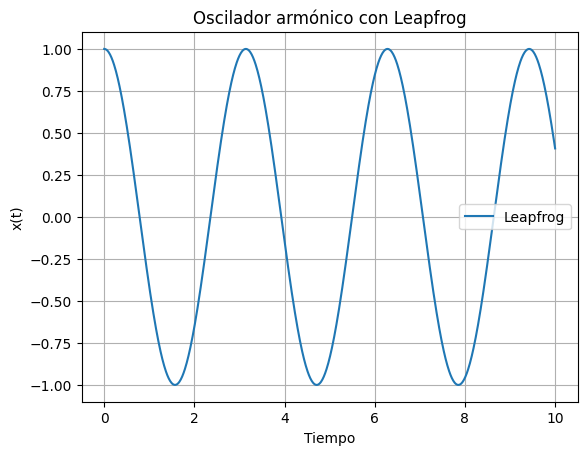

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parametros del problema
omega = 2.0
dt = 0.01
t_max = 10.0
N = int(t_max/dt)

# Vectores de tiempo, posición y velocidad
tiempo = np.linspace(0, t_max, N+1)
pos = np.zeros(N+1)
vel_half = np.zeros(N+1)  # velocidad a medio paso

# Condiciones iniciales
pos[0] = 1.0
vel0 = 0.0

# Inicializacion con medio paso en velocidad
vel_half[0] = vel0 + 0.5 * (-omega**2 * pos[0]) * dt

# Algoritmo Leapfrog
for k in range(N):
    pos[k+1] = pos[k] + vel_half[k] * dt
    vel_half[k+1] = vel_half[k] + (-omega**2 * pos[k+1]) * dt

# Grafica
plt.plot(tiempo, pos, label="Leapfrog")
plt.xlabel("Tiempo")
plt.ylabel("x(t)")
plt.title("Oscilador armónico con Leapfrog")
plt.legend()
plt.grid()
plt.show()